# 2.1 결국 가격이다

In [1]:
import pandas as pd
import xlwings as xw

path = r'data/(월간)KB주택가격동향_시계열(20211126).xlsx'
#path = r'data/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)                
sheet = wb.sheets['2.매매APT']
row_num = sheet.range((1,1)).end('down').end('down').end('down').row
data_range = 'A2:GE' + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
raw_data

,구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Kimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,20.973143,17.152933,24.274004,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2.0,20.973143,17.182661,24.234211,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3.0,20.934518,17.152933,24.194418,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,6.0,120.246305,126.177277,127.957798,128.044911,123.201071,140.097495,129.969038,122.803156,129.185363,...,108.676149,106.714819,107.291705,100.088407,99.325184,105.370034,100.946001,None,103.499302,106.076314
428,7.0,122.073099,127.795184,129.674244,129.940662,125.065092,142.414689,132.009702,124.084161,130.76635,...,109.083161,106.832476,108.13741,100.716276,100.200671,106.149786,101.242069,None,105.794801,107.059163
429,8.0,124.495019,129.831503,131.920188,131.739377,126.99974,145.26873,135.090078,126.447974,132.642771,...,109.289778,107.867171,109.874122,101.728765,100.592694,108.424654,101.820351,None,109.394653,108.426427
430,9.0,126.945035,132.029481,134.387012,134.120969,129.111093,148.814433,137.037798,128.477923,134.057679,...,109.742781,108.634969,111.372418,103.413152,101.848495,110.484822,102.473656,None,111.807059,110.062803


In [2]:
# 시-도 데이터와 구-군 데이터를 가져와 리스트로 만들기
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

In [3]:
# small_col 리스트에서 None 없애기
# enumerate에 의해 for 문에서 리스트의 순번을 함께 제공하여 num으로 가져옴
for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]

### 시-도 데이터 리스트 정리

[변경 전]
구분  전국 서울  None  None None None

[변경 후]
구분  전국 서울  서울  서울 서울 서울

In [4]:
bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1
            

In [5]:
big_col[129] = '경기' 
big_col[130] = '경기'
small_col[185] = '서귀포'

In [6]:
raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1])
new_col_data

구분          전국          서울                                      \
       구분          전국          서울          강북         강북구         광진구   
2    86.1   20.973143   17.152933   24.274004        None        None   
3     2.0   20.973143   17.182661   24.234211        None        None   
4     3.0   20.934518   17.152933   24.194418        None        None   
5     4.0   20.818644   17.034022   24.035244        None        None   
6     5.0   20.664146   16.944839   23.716896        None        None   
..    ...         ...         ...         ...         ...         ...   
427   6.0  120.246305  126.177277  127.957798  128.044911  123.201071   
428   7.0  122.073099  127.795184  129.674244  129.940662  125.065092   
429   8.0  124.495019  129.831503  131.920188  131.739377   126.99974   
430   9.0  126.945035  132.029481  134.387012  134.120969  129.111093   
431  10.0  128.610661  133.410964  135.635701  135.625977  129.399253   

                                                     ...          경남  \
            노원구         도봉구        동대문구         마포구  ...         의창구   
2          None        None        None        None  ...        None   
3          None        None        None        None  ...        None   
4          None        None        None        None  ...        None   
5          None        None        None        None  ...        None   
6          None        None        None        None  ...        None   
..          ...         ...         ...         ...  ...         ...   
427  140.097495  129.969038  122.803156  129.185363  ...  108.676149   
428  142.414689  132.009702  124.084161   130.76635  ...  109.083161   
429   145.26873  135.090078  126.447974  132.642771  ...  109.289778   
430  148.814433  137.037798  128.477923  134.057679  ...  109.742781   
431  150.255739  138.426907  129.660525  135.059091  ...  110.561422   

                                                                             \
            진해구          양산          거제          진주          김해          통영   
2          None        None        None        None        None        None   
3          None        None        None        None        None        None   
4          None        None        None        None        None        None   
5          None        None        None        None        None        None   
6          None        None        None        None        None        None   
..          ...         ...         ...         ...         ...         ...   
427  106.714819  107.291705  100.088407   99.325184  105.370034  100.946001   
428  106.832476   108.13741  100.716276  100.200671  106.149786  101.242069   
429  107.867171  109.874122  101.728765  100.592694  108.424654  101.820351   
430  108.634969  111.372418  103.413152  101.848495  110.484822  102.473656   
431  109.470492  112.001544  103.839905  102.265991  111.917196   102.60193   

      제주도                    기타지방  
      제주도         서귀포        기타지방  
2    None        None        None  
3    None        None        None  
4    None        None        None  
5    None        None        None  
6    None        None        None  
..    ...         ...         ...  
427  None  103.499302  106.076314  
428  None  105.794801  107.059163  
429  None  109.394653  108.426427  
430  None  111.807059  110.062803  
431  None  114.243799  111.225797  

[430 rows x 187 columns]

## 데이터프레임의 인덱스 정리

In [7]:
index_list = list(new_col_data['구분']['구분'])

new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if int(temp[0]) > 12:
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])
        
# 만들어진 날짜 리스트를 인덱스로 설정 
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)

## 전처리함수

## 시각화

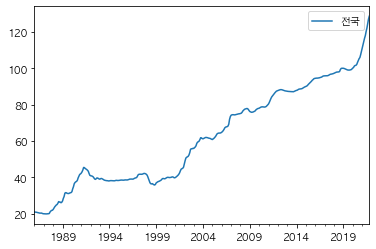

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 종합 매매가격 지수 그래프 그리기 
new_data = cleaned_data
new_data['전국']['전국'].plot(legend='전국')
plt.show()

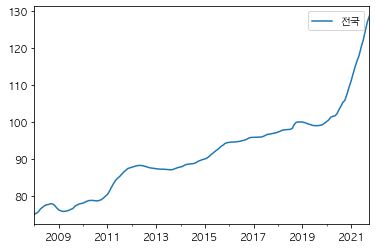

In [9]:
# 특정 지역에 원하는 시간대의 데이터를 가져와 그래프 그리기 

new_data['전국']['전국']['2008-01':].plot(legend='전국')
plt.show()

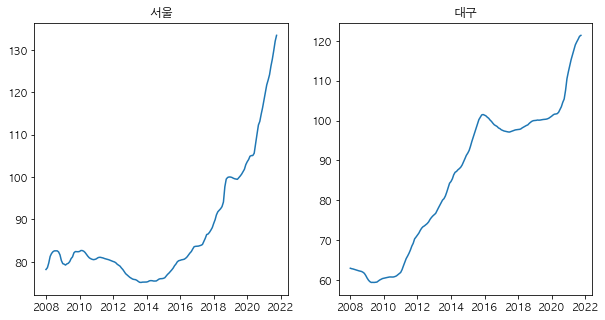

In [10]:
# subplot을 이용하여 여러 지역을 한번에 비교해 보기

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1,2,2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

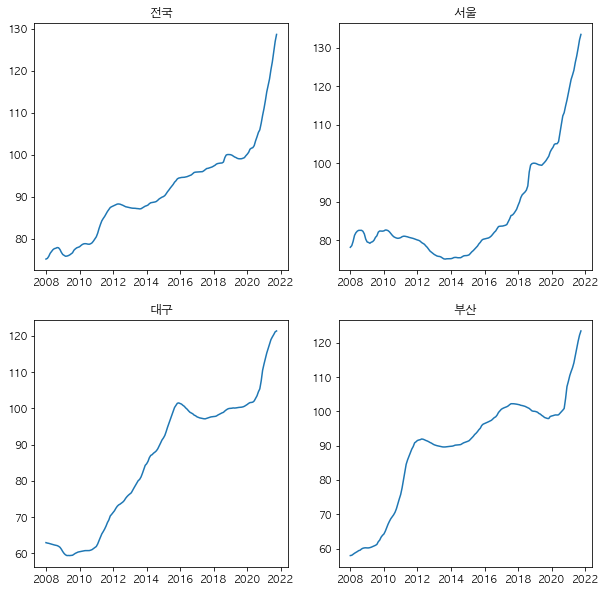

In [11]:
# 여러 지역 데이터 표시

spots = '전국 서울 대구 부산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show

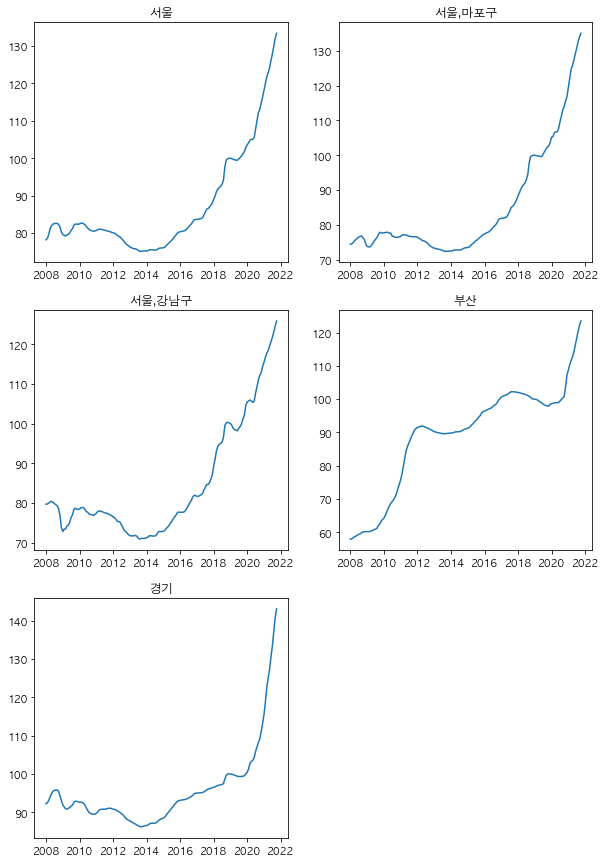

In [12]:
# [예제 2.18] 시-도 안의 구 지역 가격지수까지 subplot으로 그래프 그리기 

spots = '서울 서울,마포구 서울,강남구 부산 경기'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

## 부동산 가격지수 증감률

In [29]:
new_data.loc['2021-10-1']

전국    전국      128.610661
서울    서울      133.410964
      강북      135.635701
      강북구     135.625977
      광진구     129.399253
                 ...    
경남    김해      111.917196
      통영       102.60193
제주도   제주도           None
      서귀포     114.243799
기타지방  기타지방    111.225797
Name: 2021-10-01 00:00:00, Length: 186, dtype: object

In [30]:
(new_data.loc['2021-10-1'] - new_data.loc['2020-10-1'])/new_data.loc['2020-10-1']*100

전국    전국      21.439967
서울    서울       17.94593
      강북      19.876274
      강북구     18.972468
      광진구     11.911925
                ...    
경남    김해      17.487515
      통영       4.310983
제주도   제주도           NaN
      서귀포      18.58366
기타지방  기타지방    12.606929
Length: 186, dtype: object

In [31]:
diff = (new_data.loc['2021-10-1'] - new_data.loc['2020-10-1'])/new_data.loc['2020-10-1']*100
diff.sort_values()

전남   목포     -0.602074
충남   당진       0.35681
부산   중구      1.918856
경남   통영      4.310983
광주   동구      4.547092
              ...    
경기   덕양구    41.358068
     시흥     41.780825
인천   연수구    42.898308
경기   오산     46.579644
제주도  제주도          NaN
Length: 186, dtype: object

In [32]:
diff.dropna()

전국    전국      21.439967
서울    서울       17.94593
      강북      19.876274
      강북구     18.972468
      광진구     11.911925
                ...    
경남    진주       8.993997
      김해      17.487515
      통영       4.310983
제주도   서귀포      18.58366
기타지방  기타지방    12.606929
Length: 185, dtype: object

In [33]:
print('하위 10개')
print(diff.sort_values()[:10])
print(' ')
print('상위 10개')
diff.sort_values(ascending=False)[:10]

하위 10개
전남  목포   -0.602074
충남  당진     0.35681
부산  중구    1.918856
경남  통영    4.310983
광주  동구    4.547092
전남  전남     4.74804
    광양    5.151423
충남  논산     5.63004
전남  순천    6.225843
전북  익산    6.329843
dtype: object
 
상위 10개


경기  오산      46.579644
인천  연수구     42.898308
경기  시흥      41.780825
    덕양구     41.358068
부산  해운대구    39.647363
경기  의왕      39.300164
    일산동구    38.998074
    의정부     38.027246
    고양      37.829708
    권선구     37.166146
dtype: object

### 가격지수 증감률 시각화

posx and posy should be finite values
posx and posy should be finite values


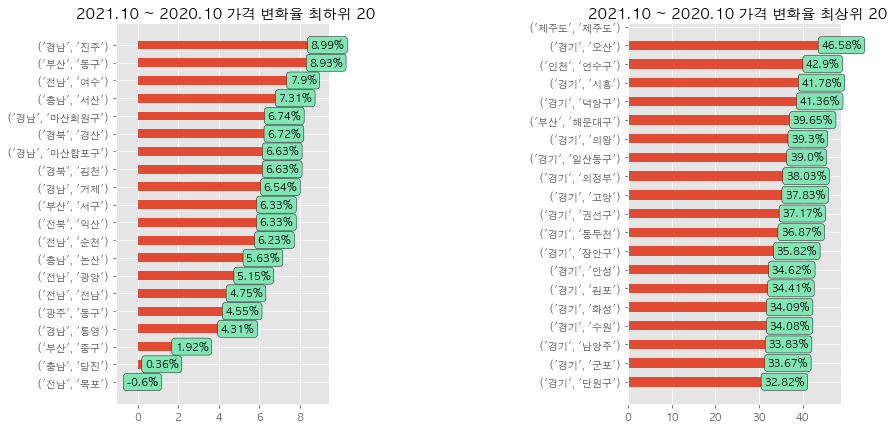

In [35]:
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13,7))
ind = np.arange(20)

ax = fig.add_subplot(1,3,1)
plt.title(' 2021.10 ~ 2020.10 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.sort_values()[:20].values[i],2)) + '%',
           ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
ax2 = fig.add_subplot(1,3,3)
plt.title(' 2021.10 ~ 2020.10 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)

for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() /2.0,
            str(round(diff.sort_values()[-20:].values[i],2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))